In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor

In [28]:
df=pd.read_csv(r"F:\House Prediction\DataSets\data.csv")

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [30]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [31]:
df2=df.drop(['street','date','country','statezip','city','condition','yr_built','yr_renovated','sqft_lot'],axis=1)


In [32]:
def remove_outliers_iqr_all_columns(dataframe, k=1.5):
    # Identify numeric columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    
    # Iterate through numeric columns
    for column in numeric_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        dataframe = dataframe[~outliers]
    
    return dataframe

df_no = remove_outliers_iqr_all_columns(df2)

In [33]:
df_no['price_per_sqft']=df_no['price']/df_no['sqft_living']

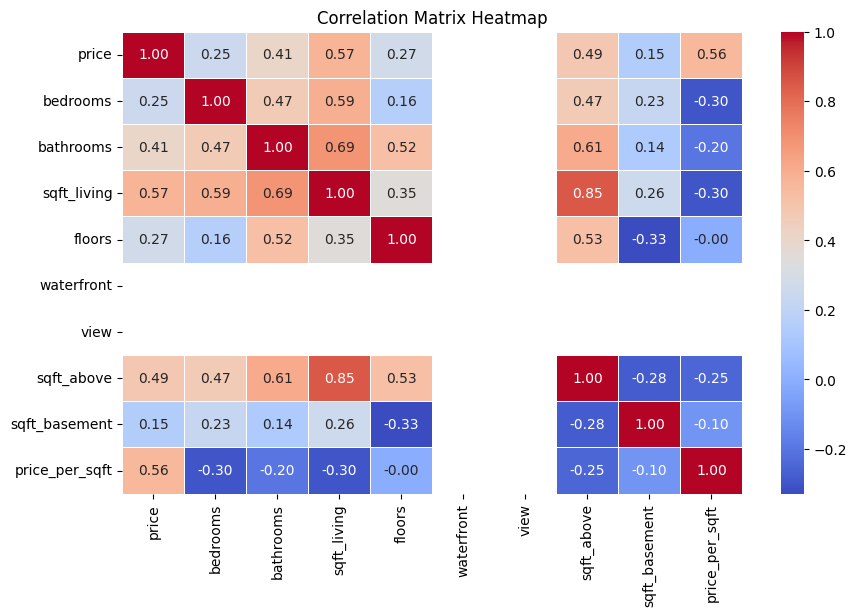

In [34]:
correlation_matrix=df_no.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#remove sqft lot because it doesn't corralate with price , year bulit , year renovated , condition

In [35]:
X=df_no.drop(['price'],axis=1).values
y=df_no['price'].values

In [36]:
df_no.shape

(3726, 10)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=lr.predict(X_test)

In [41]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(lr, X, y, scoring='r2', cv=kf)

for i, score in enumerate(cross_val_scores):
    print(f'Fold {i + 1}: R-squared = {score:.4f}')


average_score = np.mean(cross_val_scores)
print(f'Average R-squared across all folds: {average_score:.4f}')


test_r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {test_r2:.4f}')

Fold 1: R-squared = 0.9078
Fold 2: R-squared = 0.9095
Fold 3: R-squared = 0.9149
Fold 4: R-squared = 0.9029
Fold 5: R-squared = 0.9125
Average R-squared across all folds: 0.9095
R-squared on the test set: 0.9081


In [42]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error is Equal to {mse}")
print(f"Mean Average Error is Equal to {mae}")
print(f"R2 is Equal to {r2}")

Mean Squared Error is Equal to 3610961608.45891
Mean Average Error is Equal to 41794.61416239115
R2 is Equal to 0.9081231008734598


In [43]:
pva=pd.DataFrame({'predicted':y_pred,'actual':y_test})

In [44]:
pva.head()

,predicted,actual
0,220310.775391,250000.0
1,717383.049732,647500.0
2,550637.994343,583000.0
3,304575.750962,325000.0
4,413394.298917,330000.0


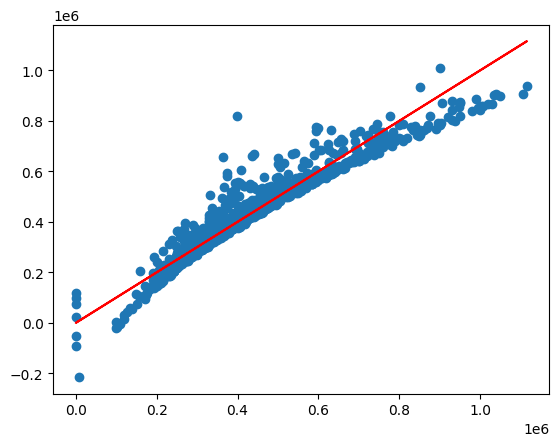

In [45]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='r')
plt.show()

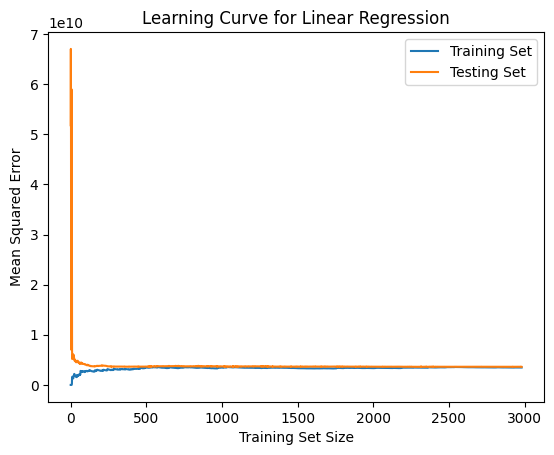

In [46]:
lr1 = LinearRegression()
train_errors = []
test_errors = []


for i in range(1, len(X_train) + 1):
    lr1.fit(X_train[:i], y_train[:i]) 
    y_train_pred = lr1.predict(X_train[:i])
    y_test_pred = lr1.predict(X_test)
    
   
    train_errors.append(mean_squared_error(y_train[:i], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))


plt.plot(range(1, len(X_train) + 1), train_errors, label='Training Set')
plt.plot(range(1, len(X_train) + 1), test_errors, label='Testing Set')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Linear Regression')
plt.legend()
plt.show()

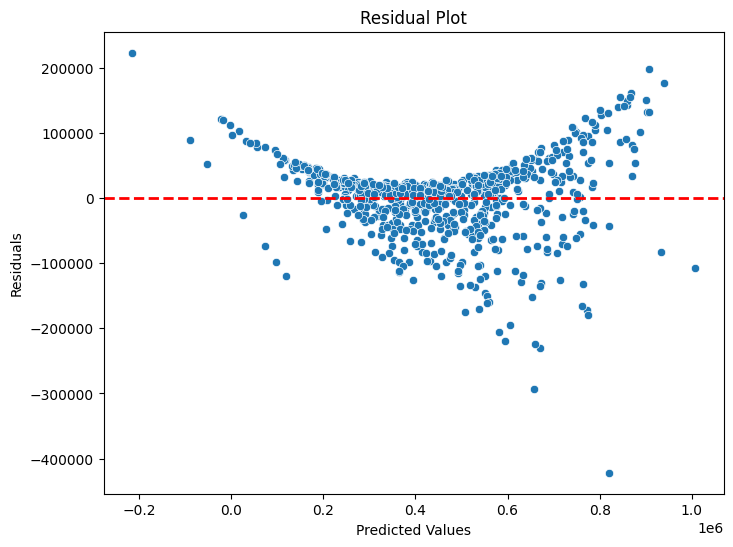

In [47]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

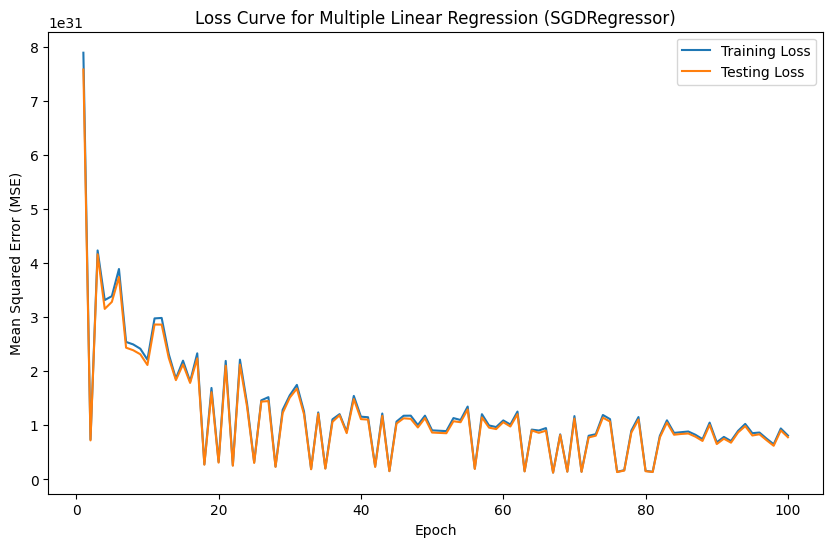

In [51]:
#Using SGD REGRESSOR BECAUSE SKLEARN LinearRegression has no history of loss on test set or training set

sgd_reg = SGDRegressor(max_iter=100, tol=1e-3, random_state=42)
train_losses = []
test_losses = []

# Training the model
for epoch in range(100):
    
    sgd_reg.partial_fit(X_train, y_train)
    
    
    y_train_pred = sgd_reg.predict(X_train)
    y_test_pred = sgd_reg.predict(X_test)
    
    
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
   
    train_losses.append(train_loss)
    test_losses.append(test_loss)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_losses, label='Training Loss')
plt.plot(range(1, 101), test_losses, label='Testing Loss')
plt.title('Loss Curve for Multiple Linear Regression (SGDRegressor)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()